In [2]:
import numpy as np
import scipy.io as sio
from pylab import *
import pandas as pd
%matplotlib inline



In [183]:
mat = sio.loadmat('data\WLDataCW.mat')

In [5]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'label'])

In [26]:
mat['data'].shape

(62, 512, 360)

In [28]:
mat['data'][:,:,0].shape

(62, 512)

In [32]:
mat['data'][0,:,0].shape

(512,)

In [56]:
data = mat['data'][0,:,0]

In [57]:
# data = np.random.uniform(0, 100, 5)

In [59]:
# data

In [61]:
fft_vals = np.absolute(np.fft.rfft(data))
fft_vals.shape

(257,)

In [144]:
fft_vals

array([1500.92779766, 1509.6818859 ,  844.75965685,  725.35059856,
        199.13428482,  701.35371531,  560.6118707 ,  169.60079908,
        219.41009447,  214.60256577,  343.91279715,  299.28283205,
        309.9185333 ,  388.81096547,  408.49237091,  154.06191246,
        206.7179157 ,  114.53579365,  186.92639687,  169.85836237,
         89.3047895 ,   28.56068868,  474.77738499,  547.22520464,
        390.74516423,  586.81006473,  404.56766548,  221.67051924,
         43.8018951 ,  228.87499691,  331.0788492 ,  266.13969917,
        329.73224232,   10.50857817,  288.84283189,  390.1673643 ,
        147.63733469,  274.43785242,  109.16349291,  379.26962093,
        332.0390206 ,  361.62756782,  290.48522785,  327.48740461,
        176.13558278,  423.48782925,  711.92592094,  107.82954982,
        477.0633488 ,   58.91297392,  326.08581233,  255.3445866 ,
        204.62781534,  491.19954863,  662.58645474,  227.28025939,
        218.71484714,  108.86838502,  194.16534481,  344.94345

In [62]:
fft_freq = np.fft.rfftfreq(len(data), 1.0/256)

In [63]:
fft_freq

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [75]:
# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band


In [65]:
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

In [66]:
np.where((fft_freq >=4) & (fft_freq <= 8))[0]

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [67]:
eeg_band_fft

{'Delta': 822.8055080157176,
 'Theta': 439.9351908020406,
 'Alpha': 229.72333510999346,
 'Beta': 282.8643597154203,
 'Gamma': 166.95683197401937}

Text(0, 0.5, 'Mean band Amplitude')

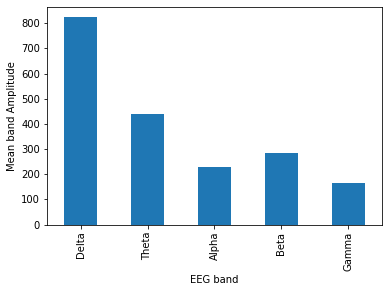

In [68]:
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")

In [95]:
np.where(mat['label']==1)[1]

array([180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
       310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
       323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
       336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
       349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359], d

In [126]:
'1st channel recorded signals'
data_1 = mat['data'][0,:,180]
data_0 = mat['data'][0,:,1]

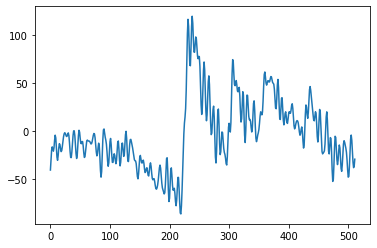

In [111]:
plot(data_1)

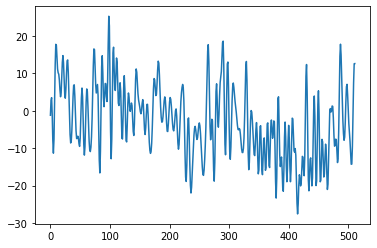

In [112]:
plot(data_0)

Text(0, 0.5, 'Mean band Amplitude')

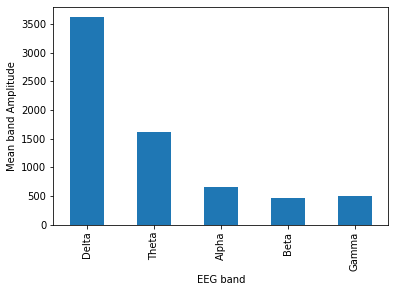

In [113]:
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}
fft_vals = np.absolute(np.fft.rfft(data_1))
fft_freq = np.fft.rfftfreq(len(data), 1.0/256)

eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")

Text(0, 0.5, 'Mean band Amplitude')

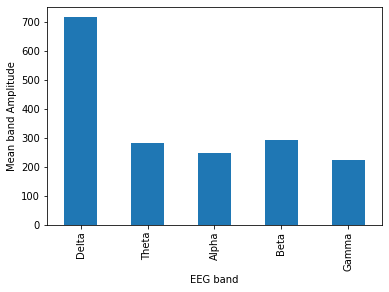

In [114]:
fft_vals = np.absolute(np.fft.rfft(data_0))
fft_freq = np.fft.rfftfreq(len(data), 1.0/256)

eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")

In [115]:
duration=2

In [120]:
t = linspace(0,2,512)

Text(0.5, 1.0, 'hakunama tata workload 0 :red , workload 1 : blue')

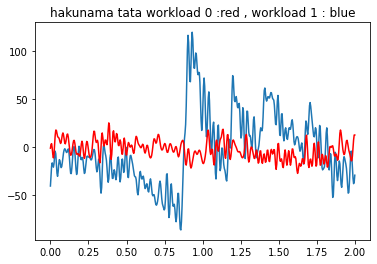

In [125]:
plot(t,data_1)
plot(t,data_0,'r')
title('hakunama tata workload 0 :red , workload 1 : blue')

In [127]:
data_1 = mat['data'][0,:,180:]
data_0 = mat['data'][0,:,:180]

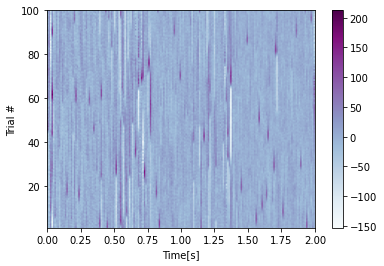

In [134]:
imshow(data_1,                                   # Image the data from condition A.
           cmap='BuPu',                            # ... set the colormap (optional)
           extent=[0, 2, 1, 100],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
xlabel('Time[s]')                              # Label the axes
ylabel('Trial #')
colorbar()                                     # Show voltage to color mapping               # Indicate stimulus onset with line
show()

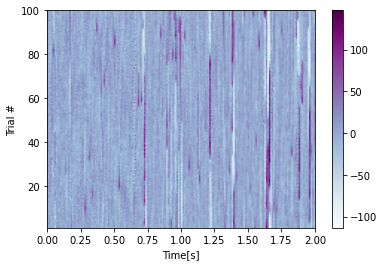

In [135]:
imshow(data_0,                                   # Image the data from condition A.
           cmap='BuPu',                            # ... set the colormap (optional)
           extent=[0, 2, 1, 100],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
xlabel('Time[s]')                              # Label the axes
ylabel('Trial #')
colorbar()                                     # Show voltage to color mapping               # Indicate stimulus onset with line
show()

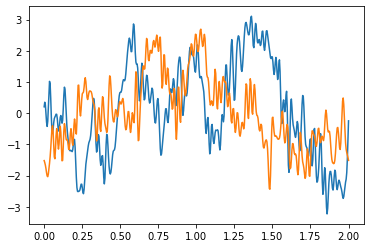

In [143]:
data_1 = mat['data'][0,:,180:]
data_0 = mat['data'][0,:,:180]

plot(t,np.mean(data_1,axis=1))
plot(t,np.mean(data_0,axis=1))

### Data Loading

In [188]:
mat = sio.loadmat('data\WLDataCW.mat')

In [145]:
from torch.utils.data import Dataset

In [ ]:
datafile = 'data\WLDataCW.mat'
data_arr = sio.loadmat(datafile)
x_ = data_arr['data']
y_ = data_arr['label'].reshape(-1)

In [388]:
indices = np.random.permutation(y_.shape[0])
training_idx, test_idx = indices[:288], indices[288:]
x_train = x_[:,:,training_idx]
y_train = y_[training_idx]

x_test = x_[:,:,test_idx]
y_test = y_[test_idx]

In [494]:
import os

class CustomDataset(Dataset):
    def __init__(self, x_arr,y_arr, transform=None, target_transform=None):
        self.data = x_arr
        self.labels = y_arr.reshape(-1)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data = self.data[:,:,idx].flatten()
        label = self.labels[idx].astype(np.float32)
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

In [536]:
len(CustomDataset(x_train,y_train))
CustomDataset(x_train,y_train).__getitem__(287)[1]

1.0

In [537]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(CustomDataset(x_train,y_train), batch_size=10, shuffle=True)
test_dataloader = DataLoader(CustomDataset(x_test,y_test), batch_size=10, shuffle=True)

In [538]:
import torch
from torch import nn

class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification,self).__init__()
        self.layer_1 = nn.Linear(31744,64)
        self.layer_2 = nn.Linear(64,64)
        self.layer_out = nn.Linear(64,1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self,inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = torch.sigmoid(self.layer_out(x))
        
        return x
    
model = BinaryClassification()
    

In [539]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        y = y.unsqueeze(1)
        loss = loss_fn(pred,y )
 
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [540]:
import torch

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            y = y.unsqueeze(1)
            test_loss += loss_fn(pred, y).item()
            correct += (torch.round(pred) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [541]:
learning_rate = 1e-3
epochs = 10
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n----------------------------")
    train_loop(train_dataloader,model,loss_fn,optimizer)
    test_loop(test_dataloader,model,loss_fn)
print("Done")

Epoch 1
----------------------------
loss: 0.612220  [    0/  288]
loss: 0.849402  [  100/  288]
loss: 0.730576  [  200/  288]
Test Error: 
 Accuracy: 55.6%, Avg loss: 0.747222 

Epoch 2
----------------------------
loss: 0.572498  [    0/  288]
loss: 0.587083  [  100/  288]
loss: 0.590333  [  200/  288]
Test Error: 
 Accuracy: 44.4%, Avg loss: 0.731365 

Epoch 3
----------------------------
loss: 0.521065  [    0/  288]
loss: 0.633856  [  100/  288]
loss: 0.377844  [  200/  288]
Test Error: 
 Accuracy: 44.4%, Avg loss: 0.792848 

Epoch 4
----------------------------
loss: 0.456366  [    0/  288]
loss: 0.521925  [  100/  288]
loss: 0.344079  [  200/  288]
Test Error: 
 Accuracy: 50.0%, Avg loss: 0.776800 

Epoch 5
----------------------------
loss: 0.319026  [    0/  288]
loss: 0.419098  [  100/  288]
loss: 0.356806  [  200/  288]
Test Error: 
 Accuracy: 47.2%, Avg loss: 0.801748 

Epoch 6
----------------------------
loss: 0.233999  [    0/  288]
loss: 0.397781  [  100/  288]
loss: 0.